In [2]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from pathlib import Path

In [4]:
### We are using model in the model_0.py file. Change this to load other models.
from model3 import model
###================================================================================================
# Specify model name to save model as. eg., "model_0", "model_1", "model_2"
MODEL_NAME = 'model_3'

In [7]:
###================================================================================================
### Plotting function
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

def plot_Acc_And_Loss2(history_dict, save=True):
    """
    Plots loss and accuracy of train and val data over epochs.
    :return:
    """
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(history_dict['accuracy'])
    axs[0].plot(history_dict['val_accuracy'])
    axs[0].set_title('training vs validation accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'val'], loc='upper left')
    axs[0].grid(True)

    axs[1].plot(history_dict['loss'])
    axs[1].plot(history_dict['val_loss'])
    axs[1].set_title('training vs validation loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'val'], loc='upper left')
    axs[1].grid(True)
    set_size(8,4)
    if save: plt.savefig('model_logs/'+MODEL_NAME+'_logs/'+MODEL_NAME+"_loss.png")
    plt.show()

In [8]:
###================================================================================================
BATCH_SIZE = 32
EPOCHS = 25

### CIFAR10 dataset loading:
### Partition data - data is already partioned from unpacking here:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
input_shape = (32,32,3) # get 1st sample's shape.

# Check shape of each partition. Each img is 32x32x3. 50000 in training set, 10000 in test set.
print("x_train shape = " + str(np.shape(x_train)))
print("y_train shape = " + str(np.shape(y_train)))
print("x_test shape = " + str(np.shape(x_test)))
print("y_test shape = " + str(np.shape(y_test)))

x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 1)
x_test shape = (10000, 32, 32, 3)
y_test shape = (10000, 1)


In [9]:
model = load_model("model/model_3")

In [10]:
###================================================================================================
### Evaluate model.
print("\nEvaluating model...\n")
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

pred_outs = model.predict(x_test)

pred_labels = np.argmax(pred_outs,axis=1)


Evaluating model...

313/313 - 7s - loss: 0.5389 - accuracy: 0.0943


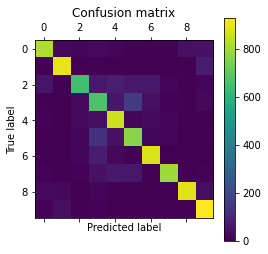

In [11]:
mat = confusion_matrix(y_test, pred_labels)
plt.matshow(mat)
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.colorbar()
plt.show()

In [12]:
print(classification_report(y_test, pred_labels))
print("Accuracy score " + str(accuracy_score(y_test, pred_labels)))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1000
           1       0.92      0.90      0.91      1000
           2       0.84      0.65      0.73      1000
           3       0.62      0.67      0.65      1000
           4       0.75      0.86      0.80      1000
           5       0.71      0.77      0.74      1000
           6       0.84      0.88      0.86      1000
           7       0.93      0.80      0.86      1000
           8       0.92      0.89      0.90      1000
           9       0.82      0.93      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Accuracy score 0.8162
